<a href="https://colab.research.google.com/github/jay-d515/5323-MachineLearning/blob/main/Assignments/A01/Dangerfield_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports libraries in
import pandas as pd
import numpy as np

## Data Analysis

In [2]:
# create a data frame with the data from cc2
df = pd.read_csv('cc2.csv')

df.describe()

,row,col,rep,line,grid,Row,Weight per row (lbs),cc_0412,cc_0415,cc_0427,...,cc_0708,cc_0713,cc_0716,cc_0719,cc_0721,cc_0725,cc_0728,cc_0802,cc_0808,cc_0812
count,875.000000,875.00000,875.000000,875.00000,875.0,875.00000,875.000000,875.000000,874.000000,874.000000,...,874.000000,874.000000,874.000000,875.000000,874.000000,875.000000,874.000000,875.000000,875.000000,874.000000
mean,4.000000,18.16800,257.161143,1.49600,1.0,35.75200,6.619561,0.332185,0.265091,2.959513,...,94.134389,95.191547,94.248925,94.638812,91.467253,87.619367,87.596221,69.590045,50.040269,31.369730
std,2.001144,9.08593,130.586830,0.50027,0.0,18.05367,2.370967,0.373851,0.373291,3.388711,...,7.652919,7.072202,7.464769,8.767108,8.479331,12.236083,10.207694,16.478898,19.321092,31.829603
min,1.000000,3.00000,0.000000,1.00000,1.0,5.00000,0.000000,0.000000,0.000000,0.000000,...,15.960181,15.825785,16.783669,19.629574,24.918213,20.619689,22.626897,21.425299,7.274665,0.047137
25%,2.000000,10.00000,139.500000,1.00000,1.0,20.00000,5.116000,0.068185,0.032675,0.649572,...,92.697571,94.287565,93.002543,94.104234,89.565949,82.527814,82.999923,58.490996,34.502141,0.594244
50%,4.000000,18.00000,244.000000,1.00000,1.0,36.00000,6.512000,0.219214,0.131598,1.875409,...,96.456050,97.155803,96.328365,97.563821,93.965945,91.747341,90.396582,71.972726,49.725851,3.918987
75%,6.000000,26.00000,348.000000,2.00000,1.0,51.00000,8.170000,0.454996,0.326757,4.414773,...,98.311454,98.698273,98.234033,99.190037,96.681748,96.598134,94.806762,82.771715,66.348776,63.287976
max,7.000000,34.00000,452.000000,2.00000,1.0,67.00000,15.650000,2.817913,3.326650,46.453710,...,100.585191,100.833861,100.357273,100.874658,99.934271,100.283598,100.119823,96.028730,88.393048,87.125766


In [3]:
# calculate the min, max, mean, and median of the yield (weight)

min = df['Weight per row (lbs)'].min()
print('min:', min)
max = df['Weight per row (lbs)'].max()
print('max:', max)
mean = df['Weight per row (lbs)'].mean()
print('mean:', mean)
median = df['Weight per row (lbs)'].median()
print('median:', median)


min: 0.0
max: 15.65
mean: 6.619561142857143
median: 6.512


In [4]:
# Count how many entries have a yield above the median
above_median = df[df['Weight per row (lbs)'] > median]
print(len(above_median), 'entries have a yield above the median')

# Count how many entries have a yield above the mean
above_mean = df[df['Weight per row (lbs)'] > mean]
print(len(above_mean), 'entries have a yield above the mean')

437 entries have a yield above the median
425 entries have a yield above the mean


In [5]:
# Check for any unexpected or unrealistic yield values
below_zero = (df[df['Weight per row (lbs)'] < 0])
print(len(below_zero), 'entries have a yield below zero')

equal_zero = (df[df['Weight per row (lbs)'] == 0])
print(len(equal_zero), 'entries have a yield of zero')

0 entries have a yield below zero
3 entries have a yield of zero


In [6]:
# Count the total number of missing (NaN) values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

row                     0
col                     0
rep                     0
line                    0
grid                    0
irrigation              0
Row                     0
Weight per row (lbs)    0
cc_0412                 0
cc_0415                 1
cc_0427                 1
cc_0506                 0
cc_0516                 2
cc_0520                 1
cc_0523                 1
cc_0527                 0
cc_0531                 1
cc_0602                 0
cc_0607                 1
cc_0614                 0
cc_0617                 0
cc_0620                 0
cc_0623                 0
cc_0627                 2
cc_0630                 1
cc_0708                 1
cc_0713                 1
cc_0716                 1
cc_0719                 0
cc_0721                 1
cc_0725                 0
cc_0728                 1
cc_0802                 0
cc_0808                 0
cc_0812                 1
dtype: int64


In [7]:
# Count how many rows contain at least one NaN
nan_rows = df[df.isnull().any(axis=1)]
print(len(nan_rows), 'rows contain at least one NaN')

10 rows contain at least one NaN


# Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# identify canopy cover columns
canopy_cover_cols = [col for col in df.columns if col.startswith('cc_')]
print("Canopy cover columns:", canopy_cover_cols)

Canopy cover columns: ['cc_0412', 'cc_0415', 'cc_0427', 'cc_0506', 'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602', 'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627', 'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721', 'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812']


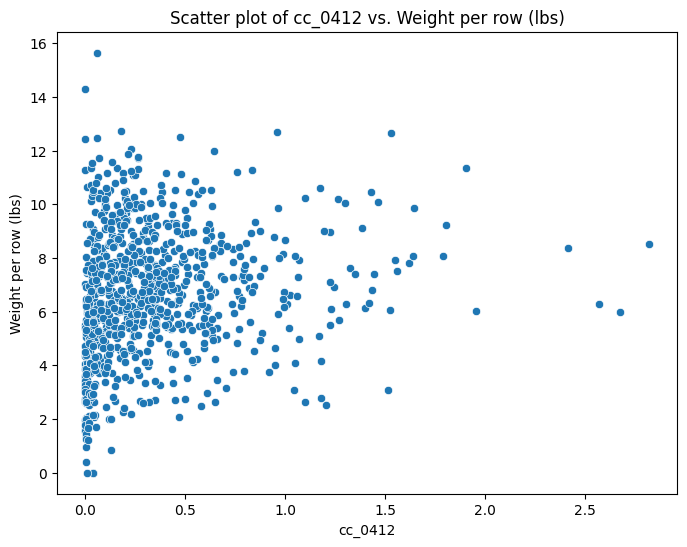

Correlation between cc_0412 and Weight per row (lbs): 0.1737


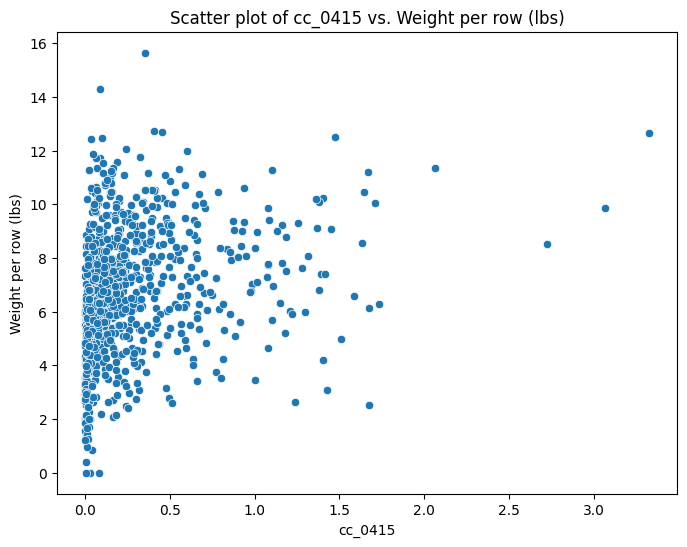

Correlation between cc_0415 and Weight per row (lbs): 0.2713


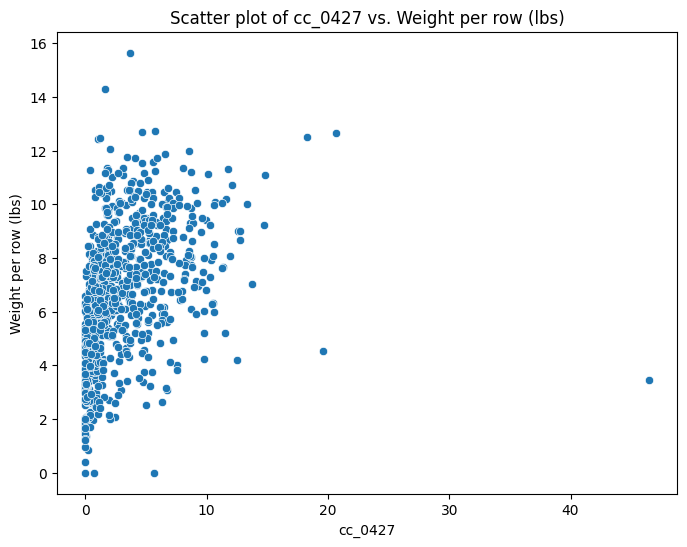

Correlation between cc_0427 and Weight per row (lbs): 0.3807


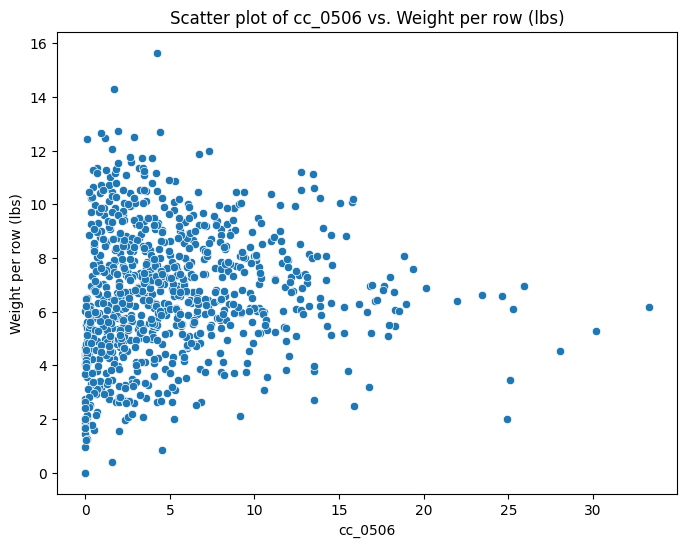

Correlation between cc_0506 and Weight per row (lbs): 0.0929


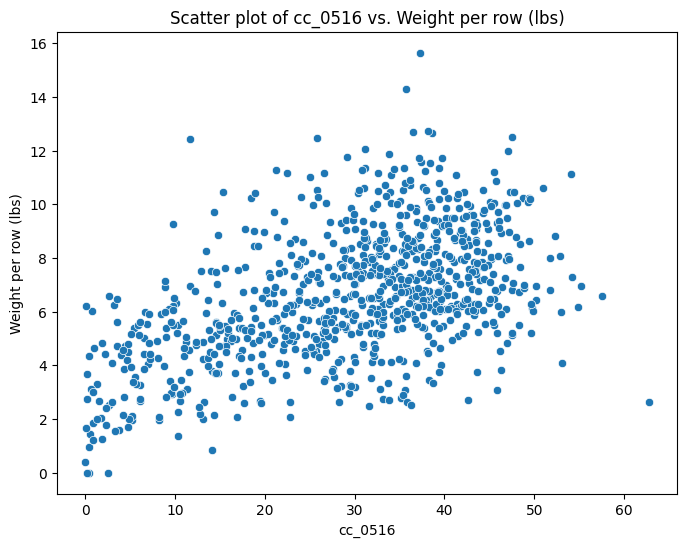

Correlation between cc_0516 and Weight per row (lbs): 0.5169


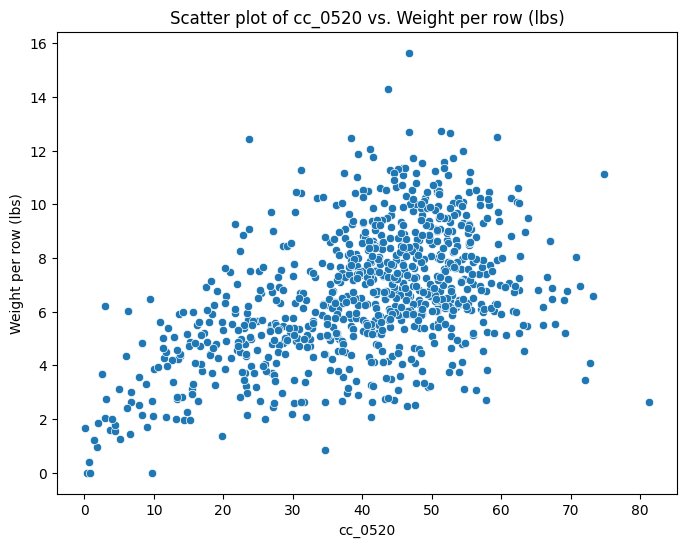

Correlation between cc_0520 and Weight per row (lbs): 0.4911


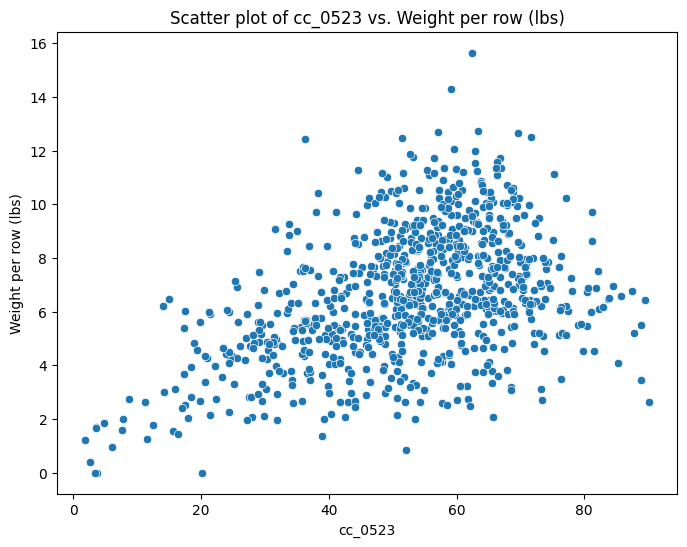

Correlation between cc_0523 and Weight per row (lbs): 0.4307


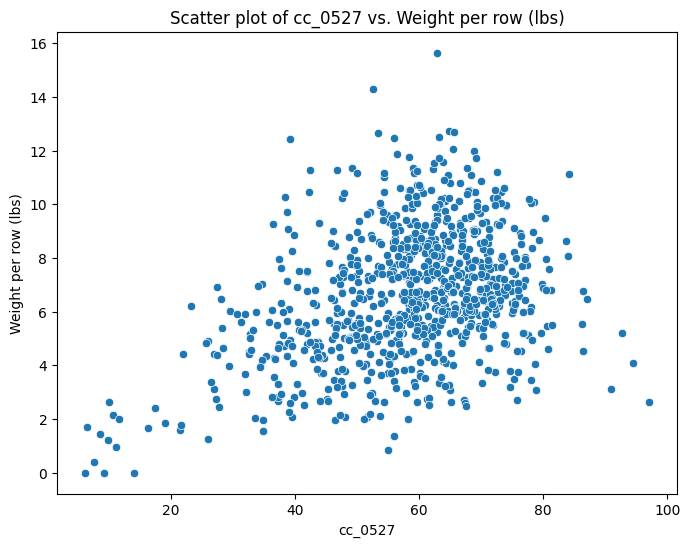

Correlation between cc_0527 and Weight per row (lbs): 0.3645


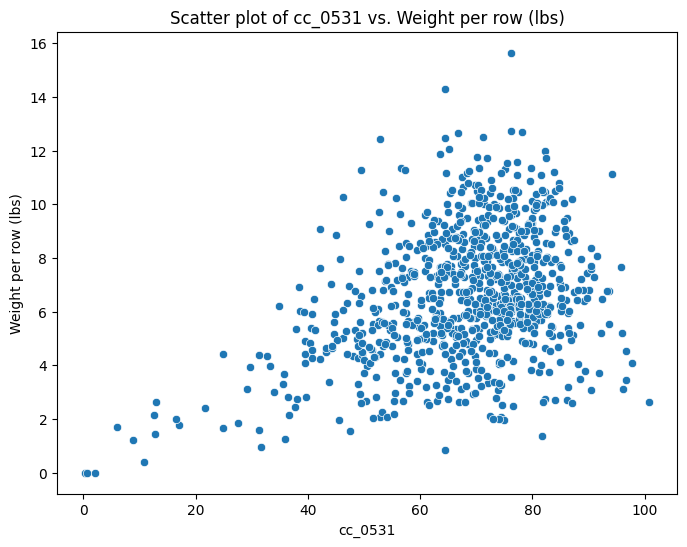

Correlation between cc_0531 and Weight per row (lbs): 0.3629


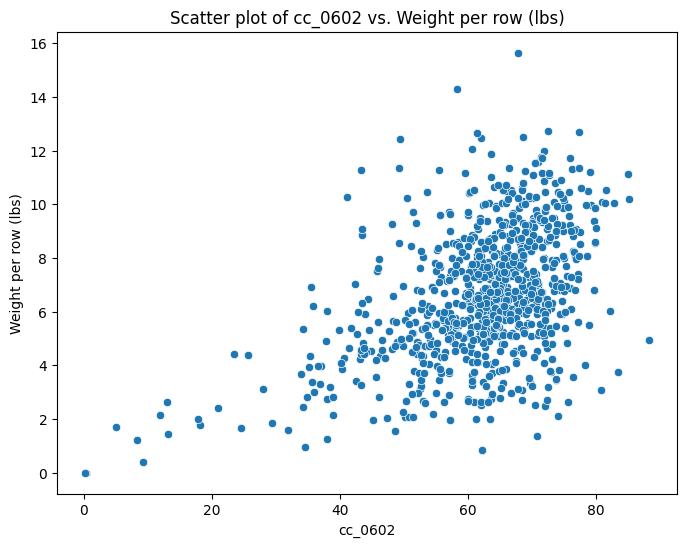

Correlation between cc_0602 and Weight per row (lbs): 0.4739


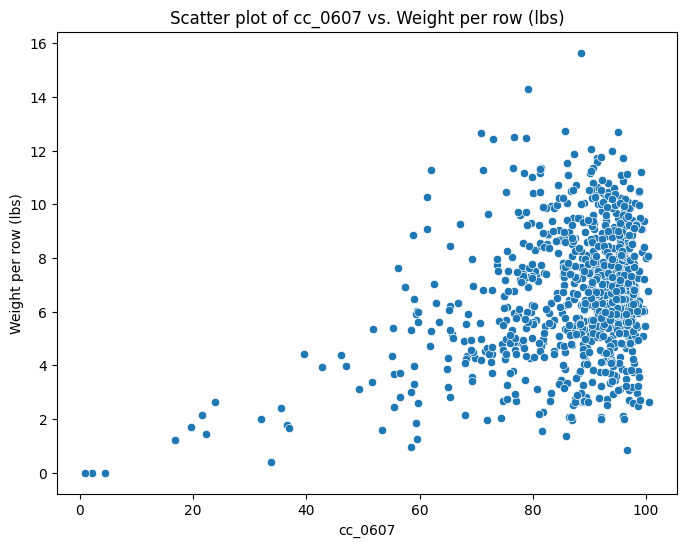

Correlation between cc_0607 and Weight per row (lbs): 0.3153


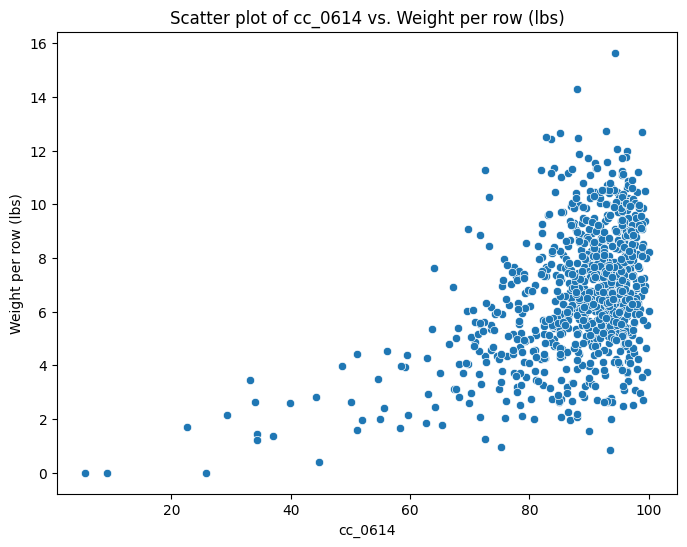

Correlation between cc_0614 and Weight per row (lbs): 0.4475


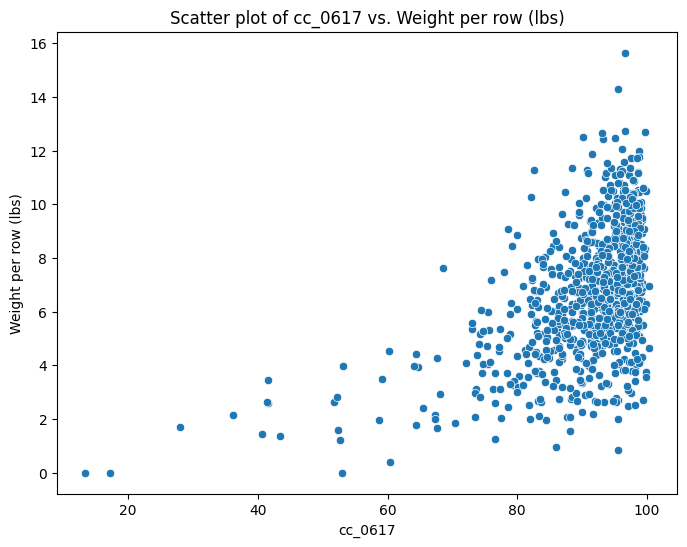

Correlation between cc_0617 and Weight per row (lbs): 0.4901


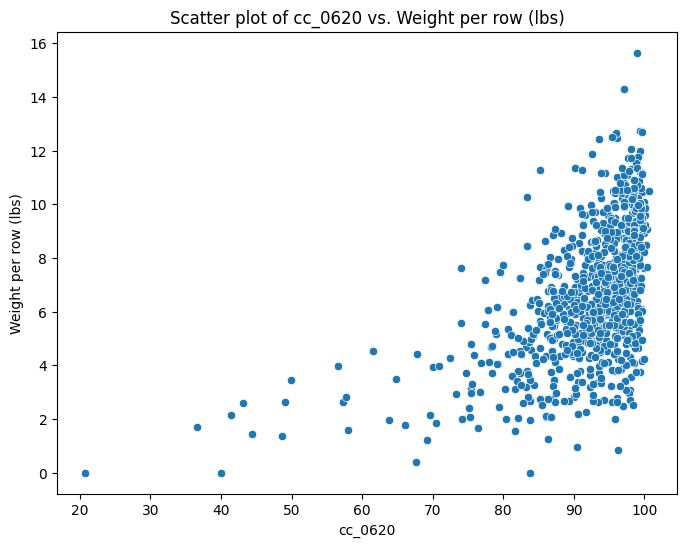

Correlation between cc_0620 and Weight per row (lbs): 0.5228


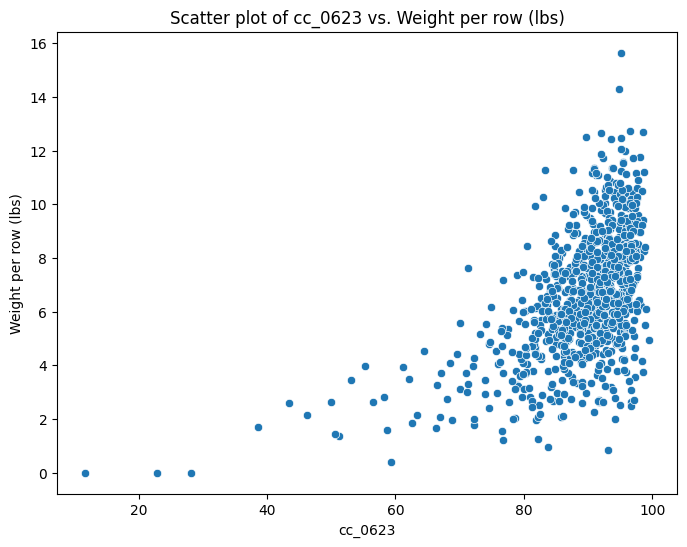

Correlation between cc_0623 and Weight per row (lbs): 0.5267


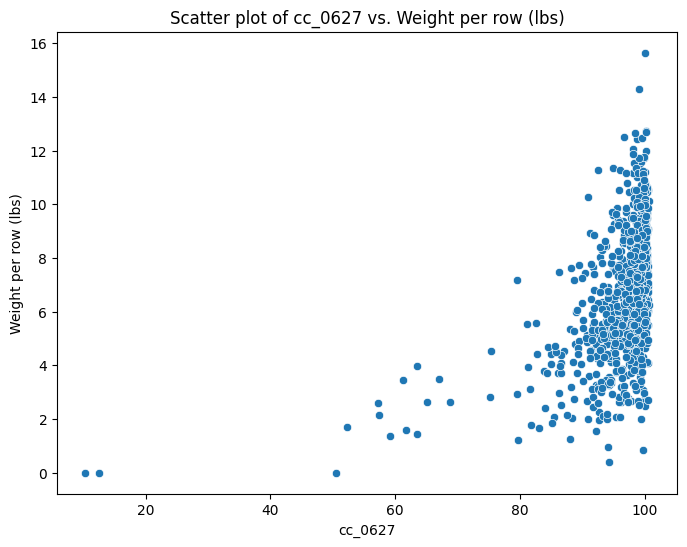

Correlation between cc_0627 and Weight per row (lbs): 0.4368


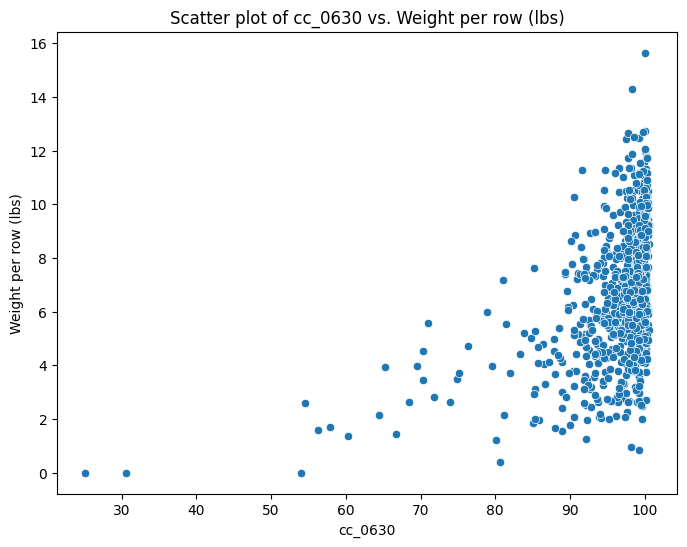

Correlation between cc_0630 and Weight per row (lbs): 0.4343


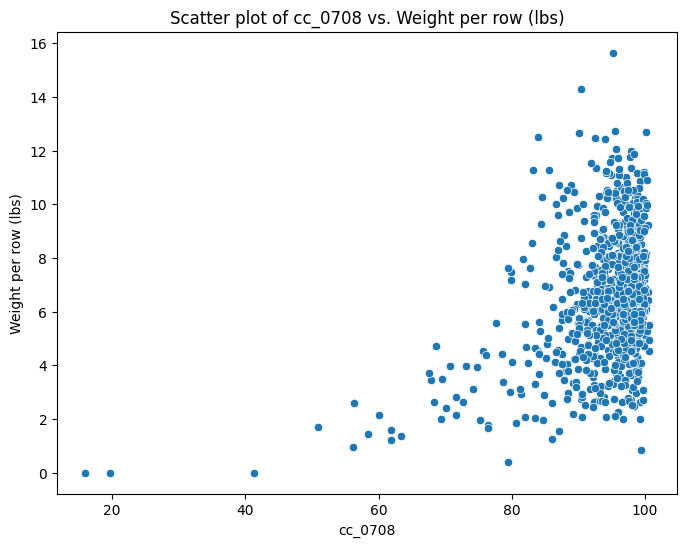

Correlation between cc_0708 and Weight per row (lbs): 0.3836


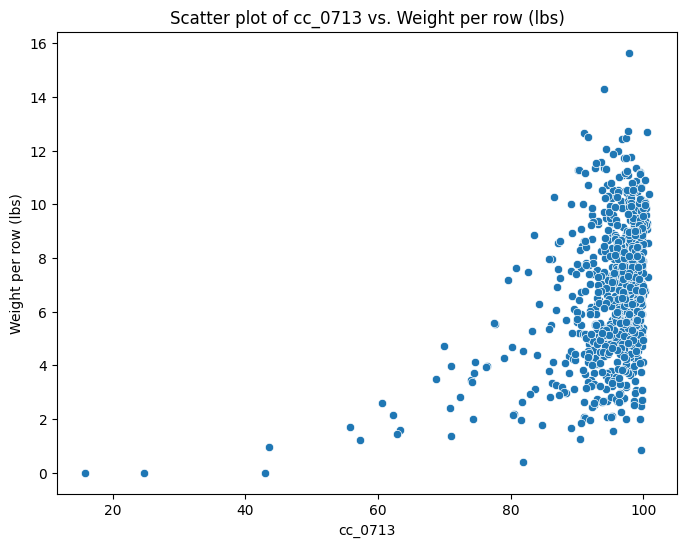

Correlation between cc_0713 and Weight per row (lbs): 0.3795


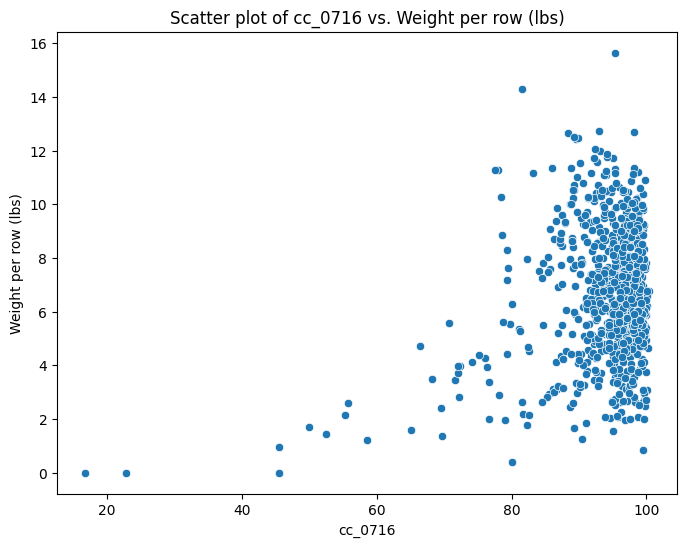

Correlation between cc_0716 and Weight per row (lbs): 0.2313


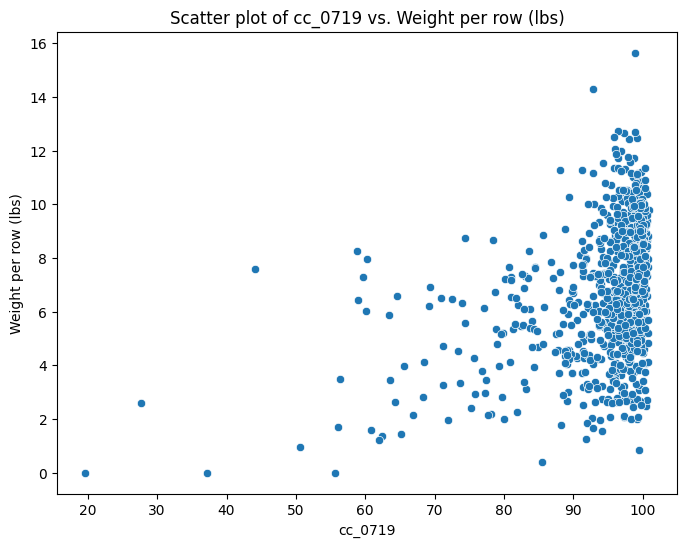

Correlation between cc_0719 and Weight per row (lbs): 0.3341


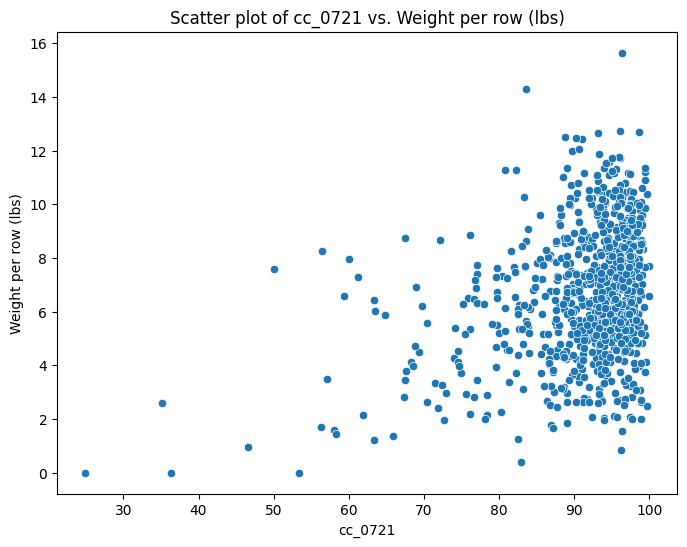

Correlation between cc_0721 and Weight per row (lbs): 0.3035


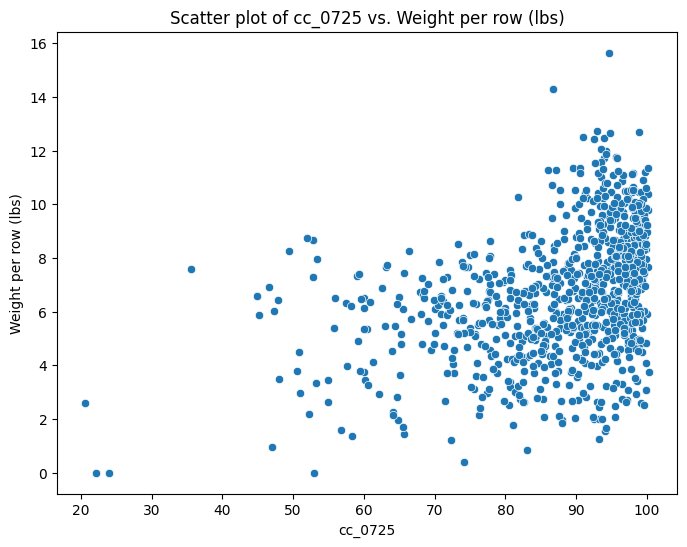

Correlation between cc_0725 and Weight per row (lbs): 0.3713


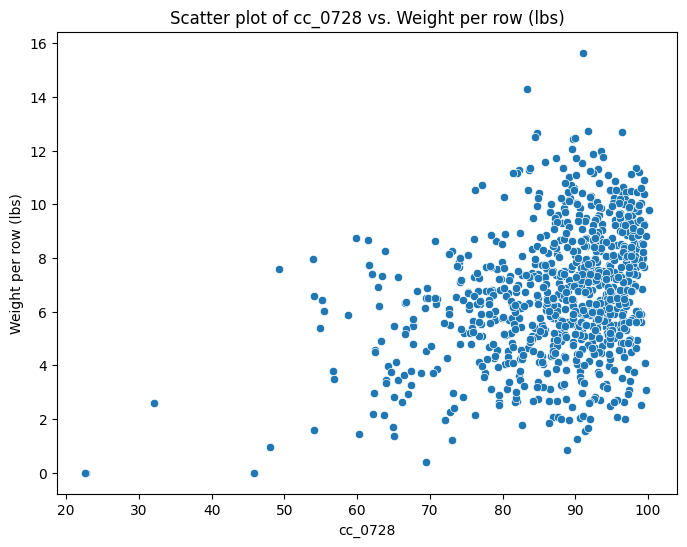

Correlation between cc_0728 and Weight per row (lbs): 0.3315


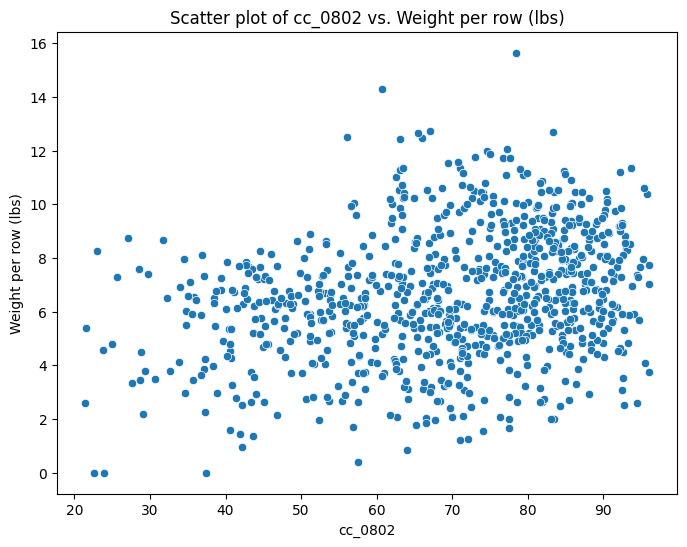

Correlation between cc_0802 and Weight per row (lbs): 0.2753


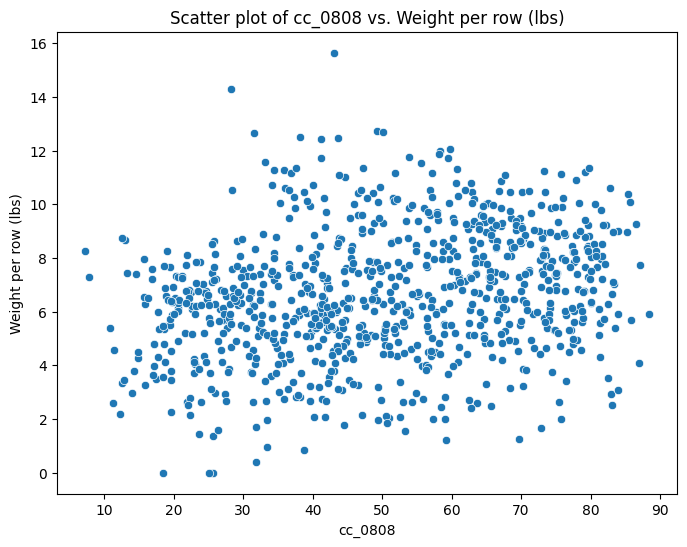

Correlation between cc_0808 and Weight per row (lbs): 0.2497


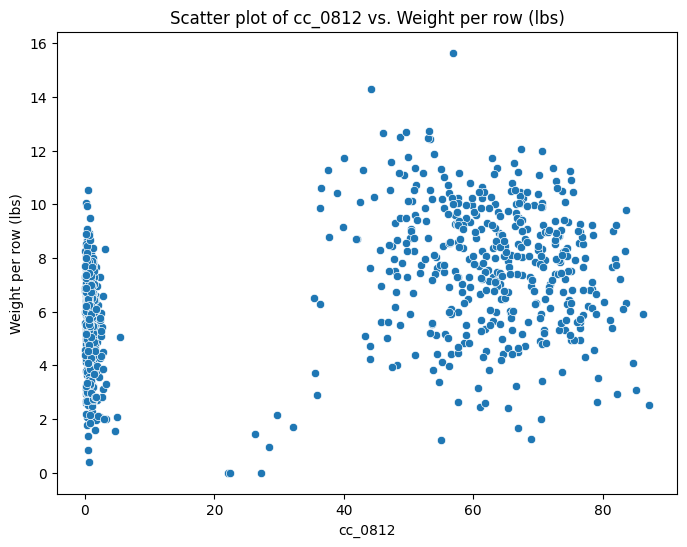

Correlation between cc_0812 and Weight per row (lbs): 0.4235


In [10]:
# Create scatter plots between each canopy cover feature and yield.
for col in canopy_cover_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Weight per row (lbs)')
    plt.title(f'Scatter plot of {col} vs. Weight per row (lbs)')
    plt.xlabel(col)
    plt.ylabel('Weight per row (lbs)')
    plt.show()
  # Report the correlation between each feature and yield
    correlation = df[col].corr(df['Weight per row (lbs)'])
    print(f'Correlation between {col} and Weight per row (lbs): {correlation:.4f}')

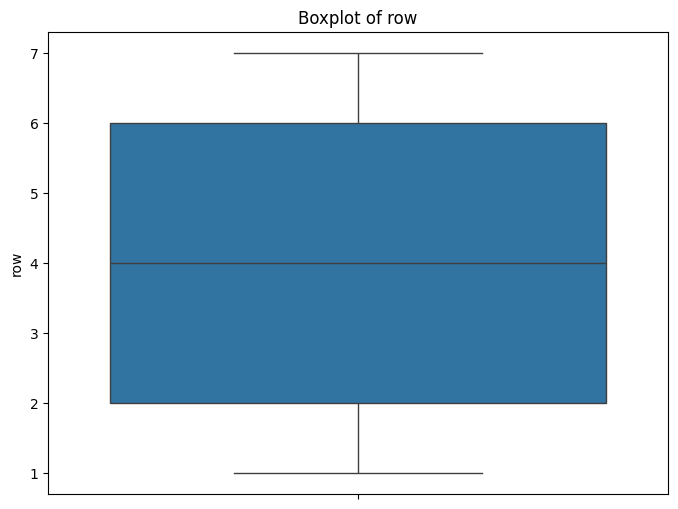

Correlation between row and Weight per row (lbs): -0.1094


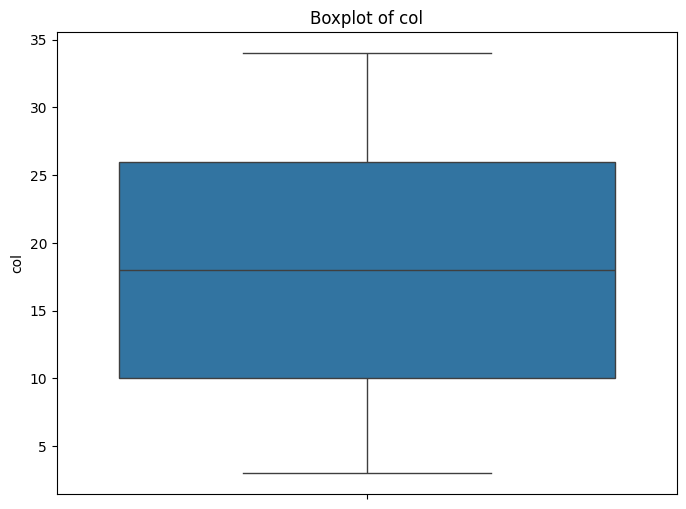

Correlation between col and Weight per row (lbs): 0.0641


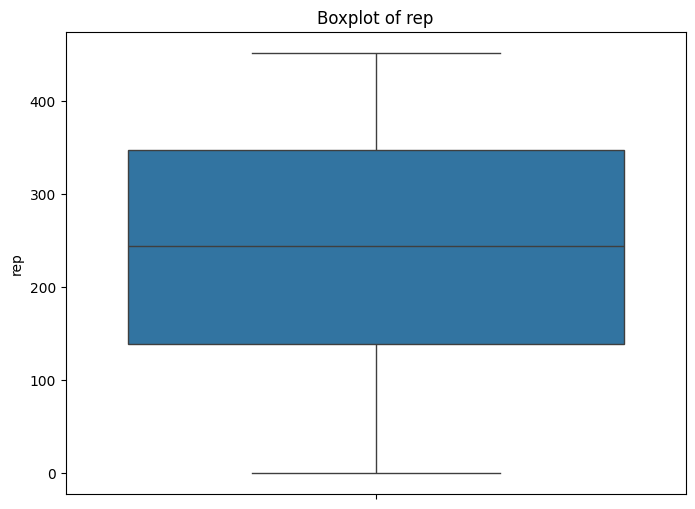

Correlation between rep and Weight per row (lbs): 0.0836


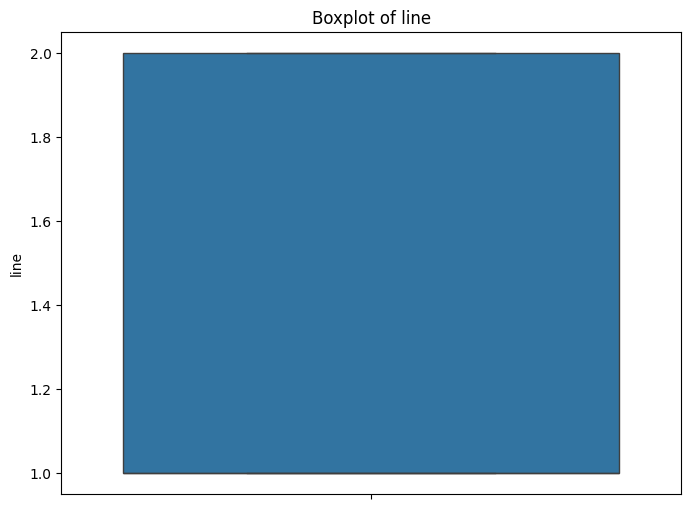

Correlation between line and Weight per row (lbs): -0.0245


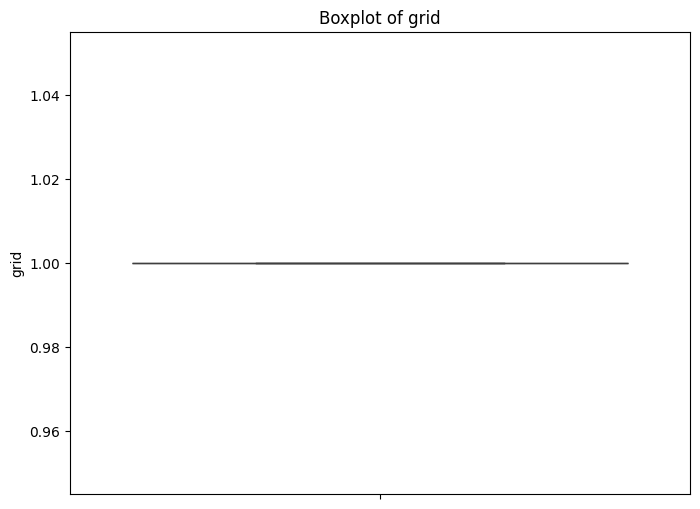

Correlation between grid and Weight per row (lbs): nan


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


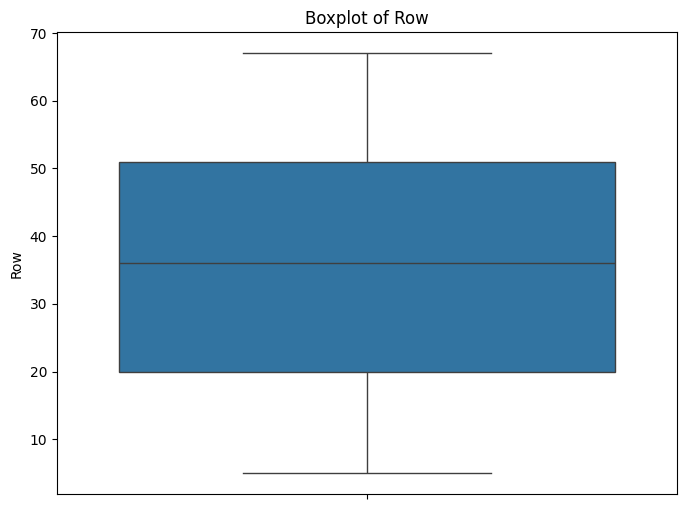

Correlation between Row and Weight per row (lbs): 0.0645


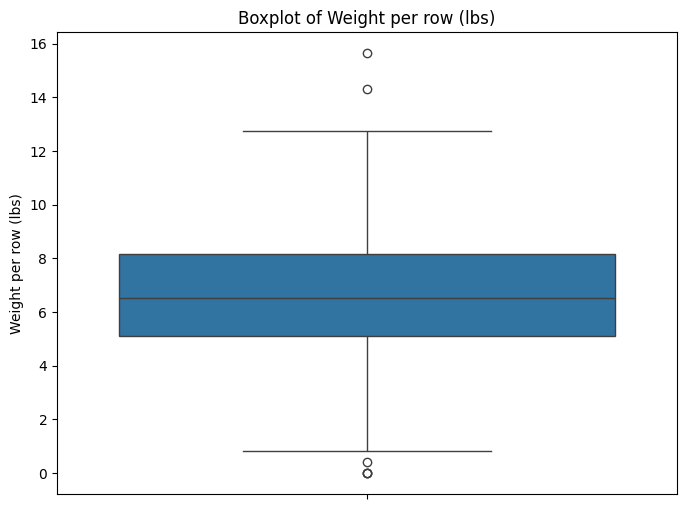

Correlation between Weight per row (lbs) and Weight per row (lbs): 1.0000


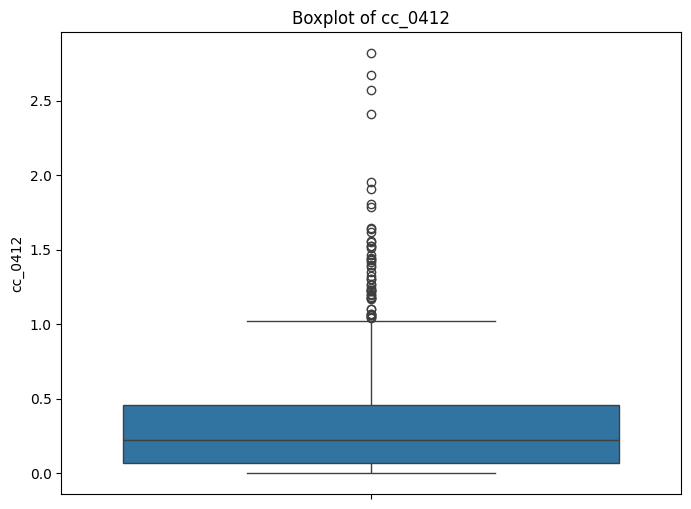

Correlation between cc_0412 and Weight per row (lbs): 0.1737


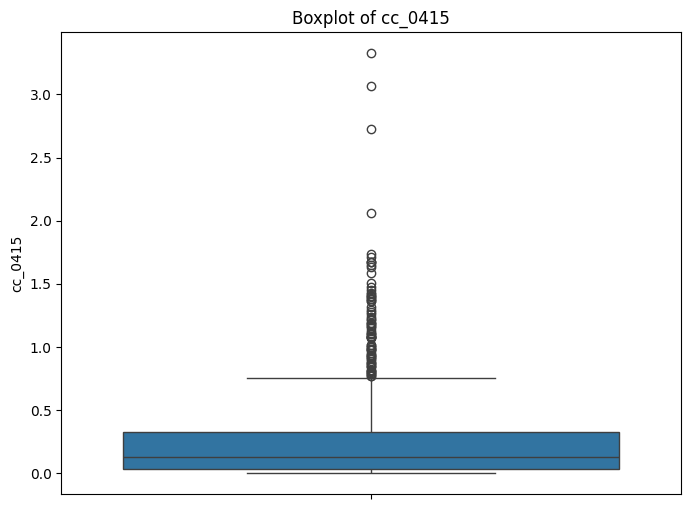

Correlation between cc_0415 and Weight per row (lbs): 0.2713


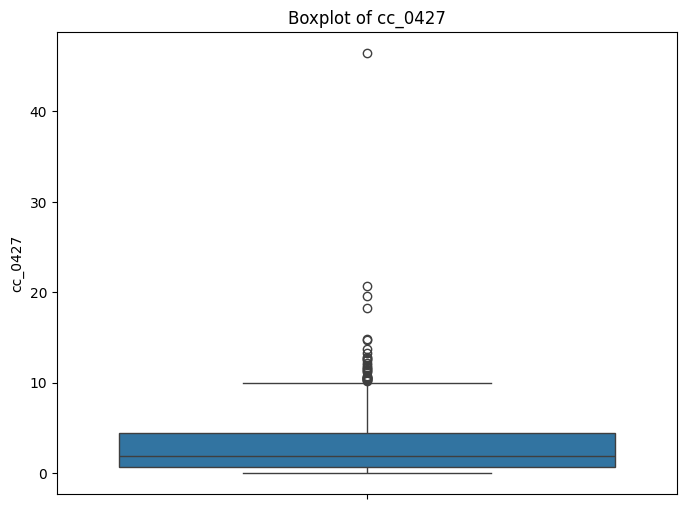

Correlation between cc_0427 and Weight per row (lbs): 0.3807


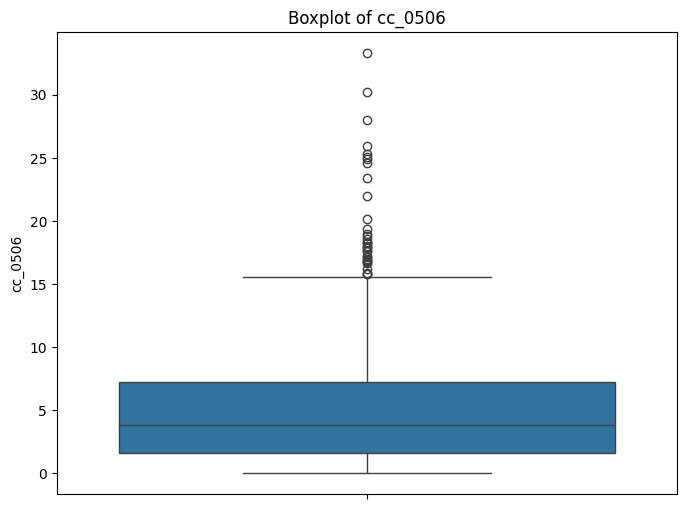

Correlation between cc_0506 and Weight per row (lbs): 0.0929


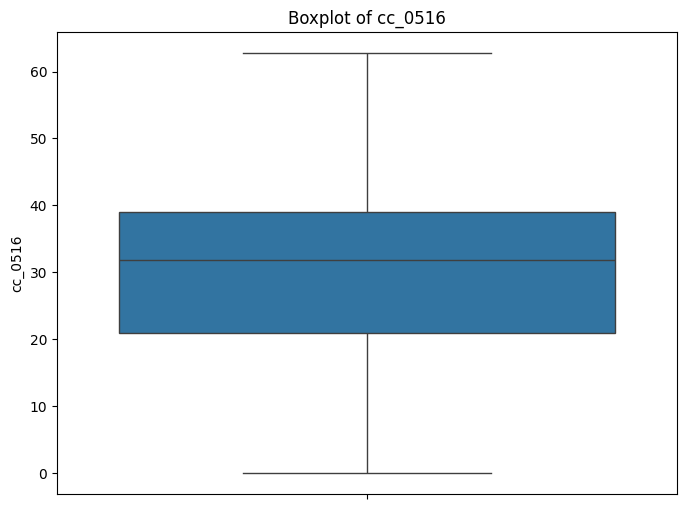

Correlation between cc_0516 and Weight per row (lbs): 0.5169


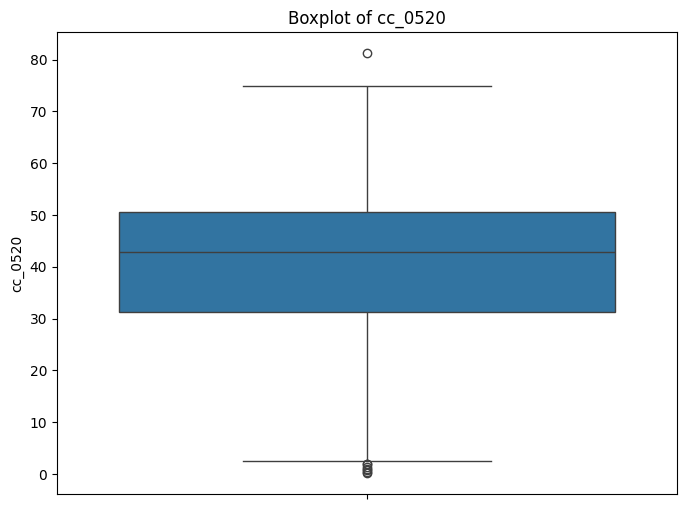

Correlation between cc_0520 and Weight per row (lbs): 0.4911


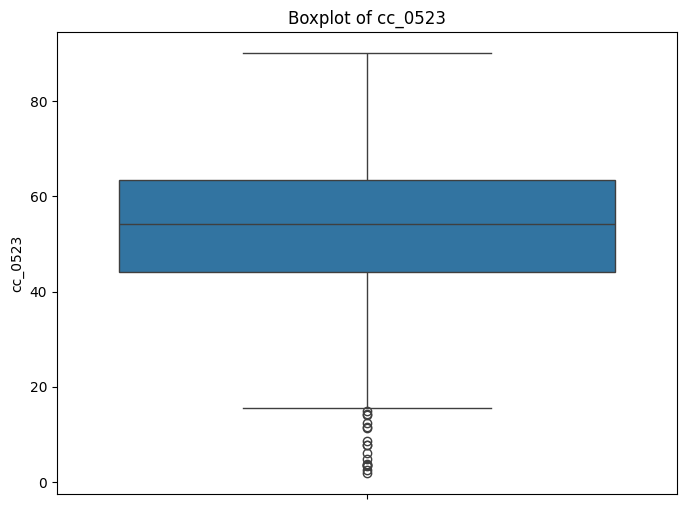

Correlation between cc_0523 and Weight per row (lbs): 0.4307


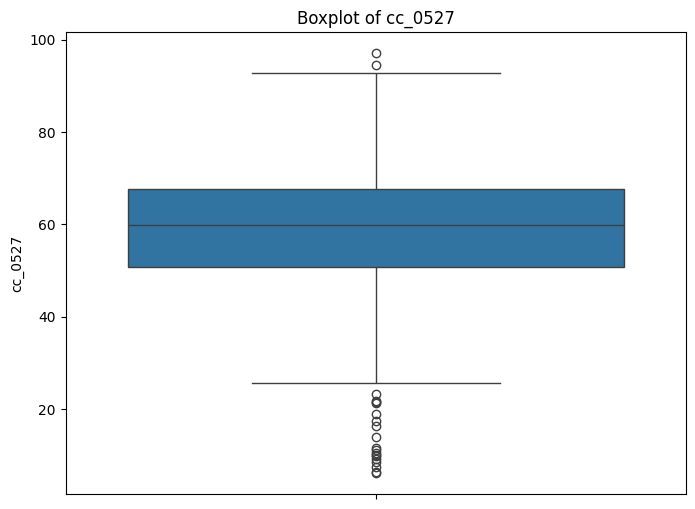

Correlation between cc_0527 and Weight per row (lbs): 0.3645


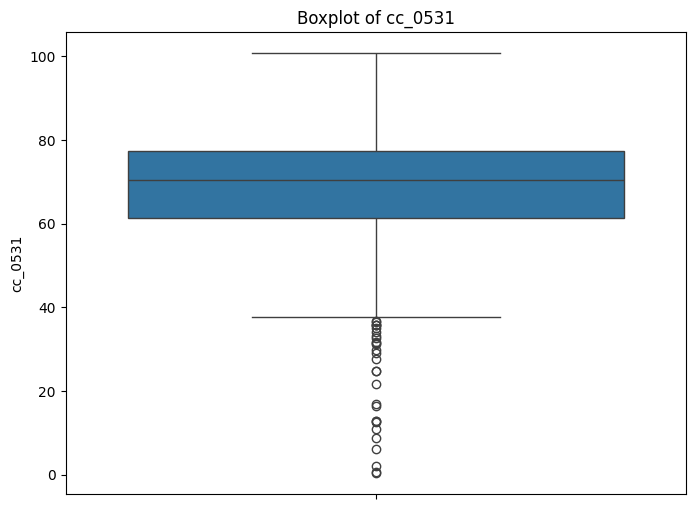

Correlation between cc_0531 and Weight per row (lbs): 0.3629


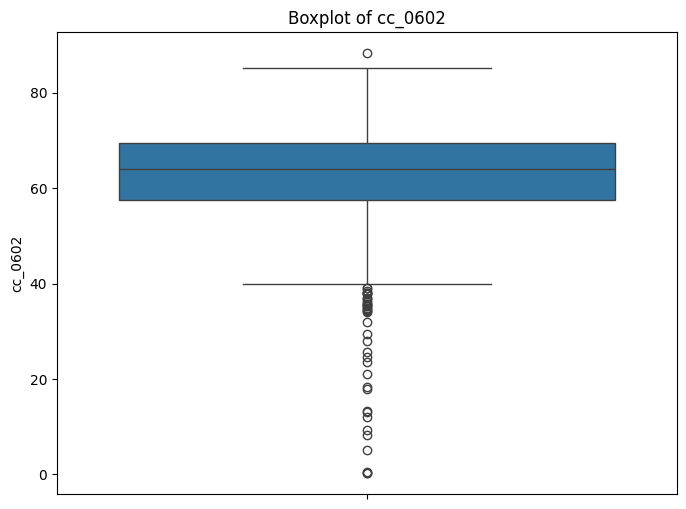

Correlation between cc_0602 and Weight per row (lbs): 0.4739


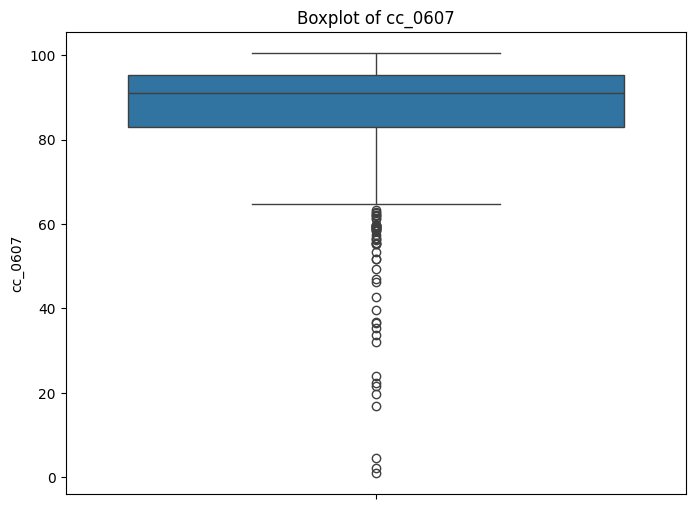

Correlation between cc_0607 and Weight per row (lbs): 0.3153


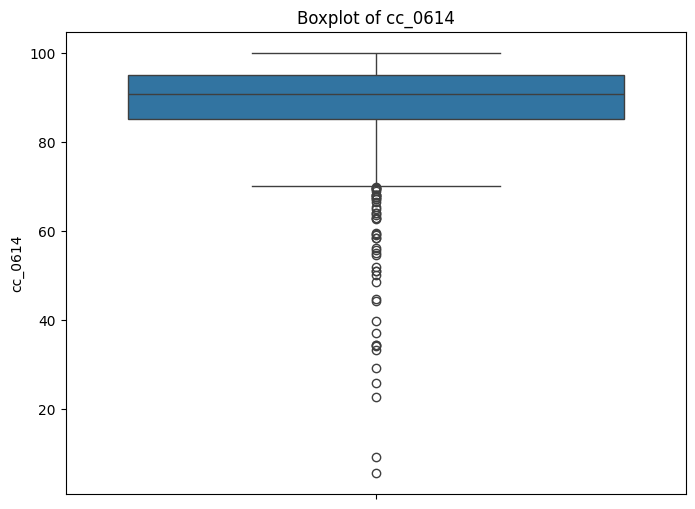

Correlation between cc_0614 and Weight per row (lbs): 0.4475


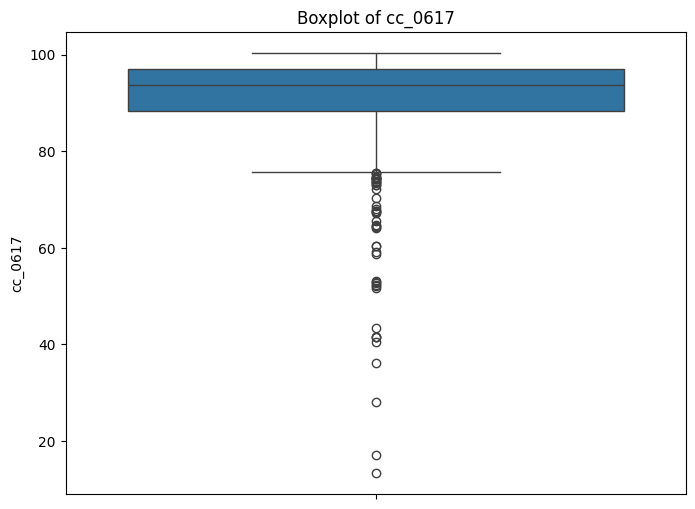

Correlation between cc_0617 and Weight per row (lbs): 0.4901


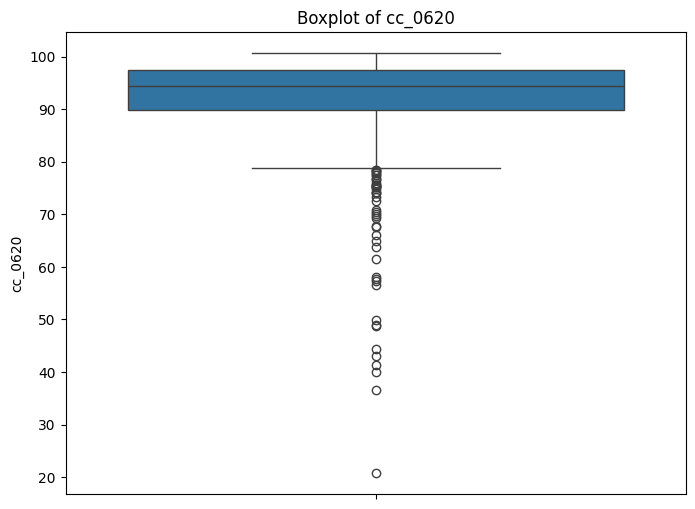

Correlation between cc_0620 and Weight per row (lbs): 0.5228


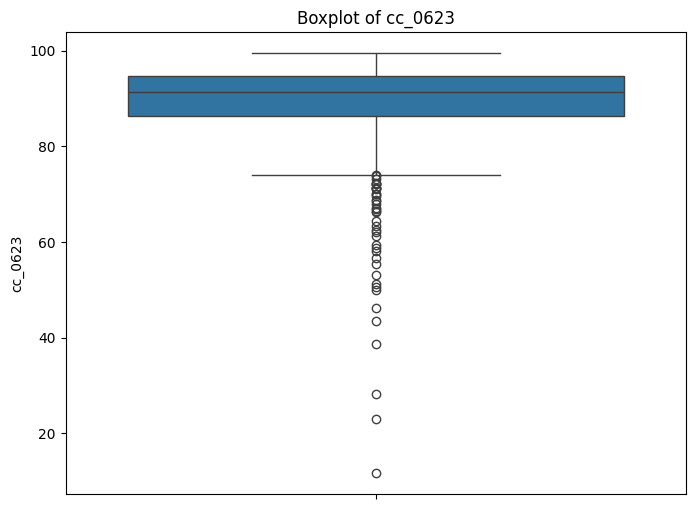

Correlation between cc_0623 and Weight per row (lbs): 0.5267


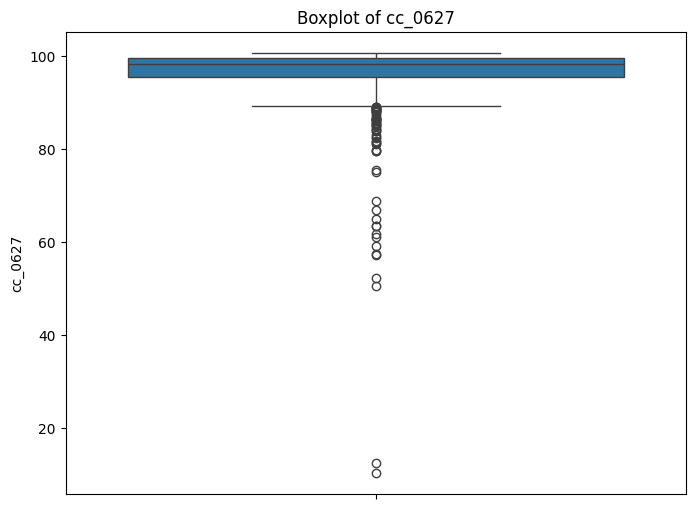

Correlation between cc_0627 and Weight per row (lbs): 0.4368


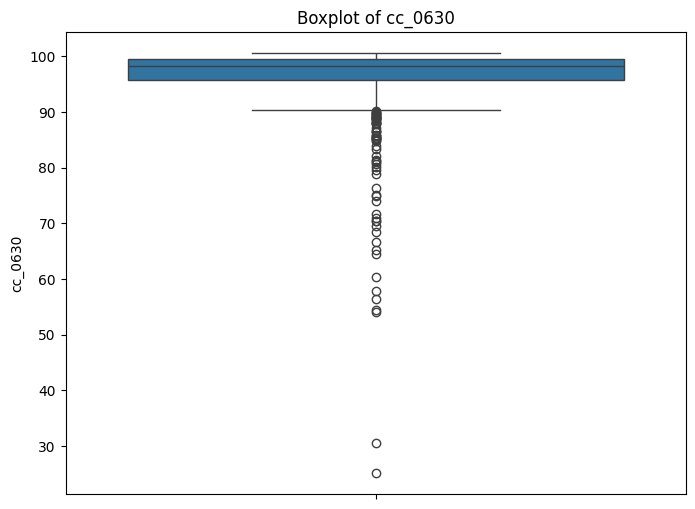

Correlation between cc_0630 and Weight per row (lbs): 0.4343


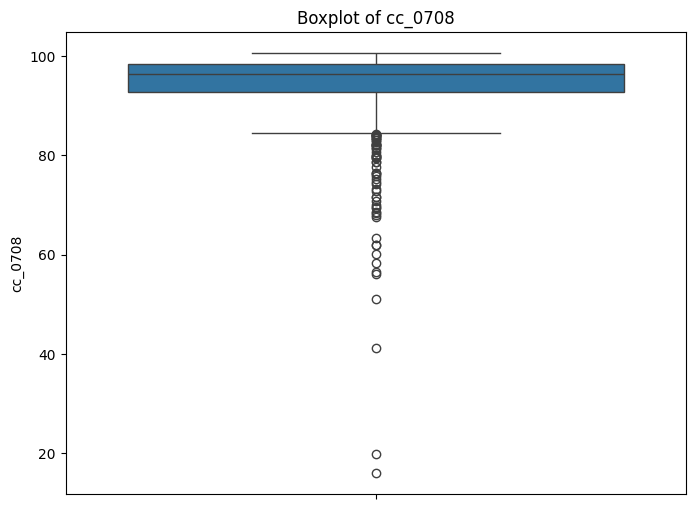

Correlation between cc_0708 and Weight per row (lbs): 0.3836


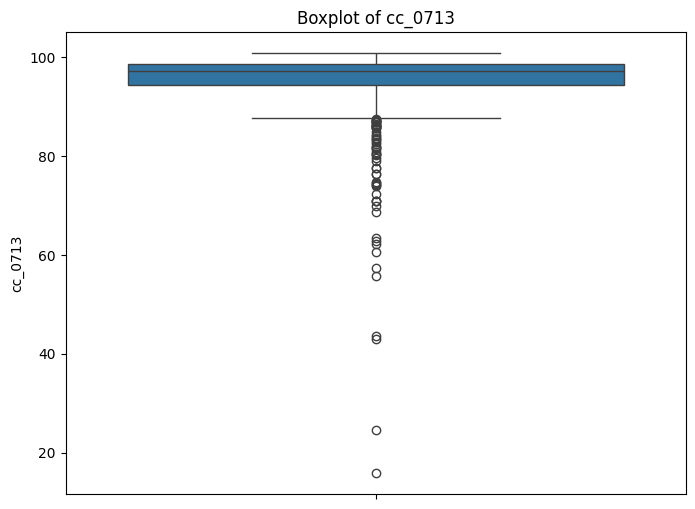

Correlation between cc_0713 and Weight per row (lbs): 0.3795


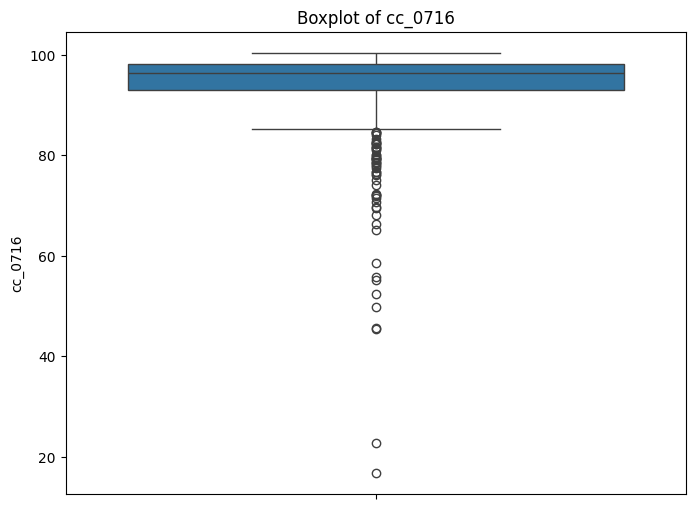

Correlation between cc_0716 and Weight per row (lbs): 0.2313


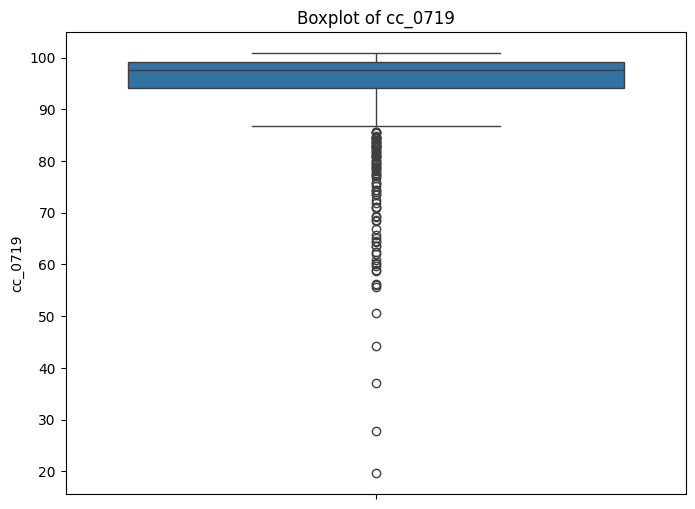

Correlation between cc_0719 and Weight per row (lbs): 0.3341


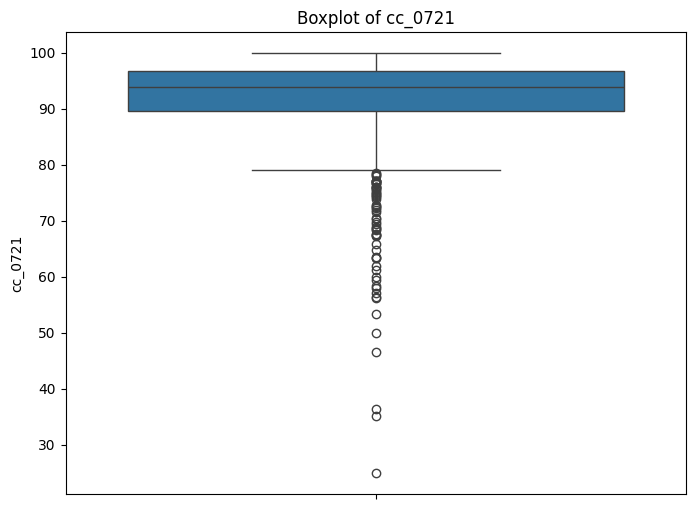

Correlation between cc_0721 and Weight per row (lbs): 0.3035


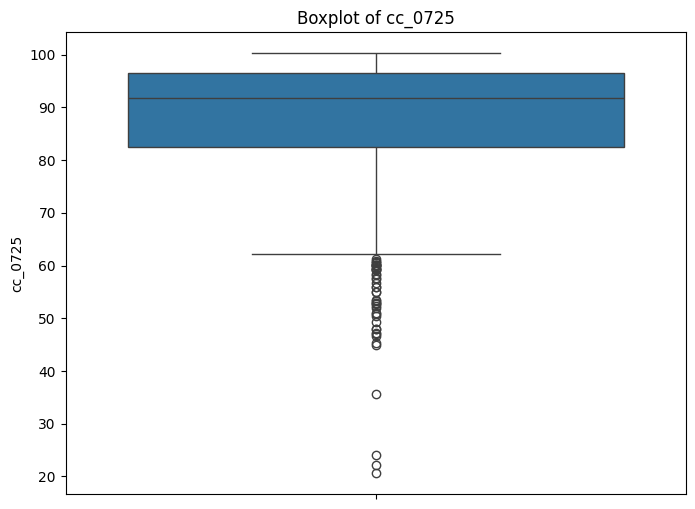

Correlation between cc_0725 and Weight per row (lbs): 0.3713


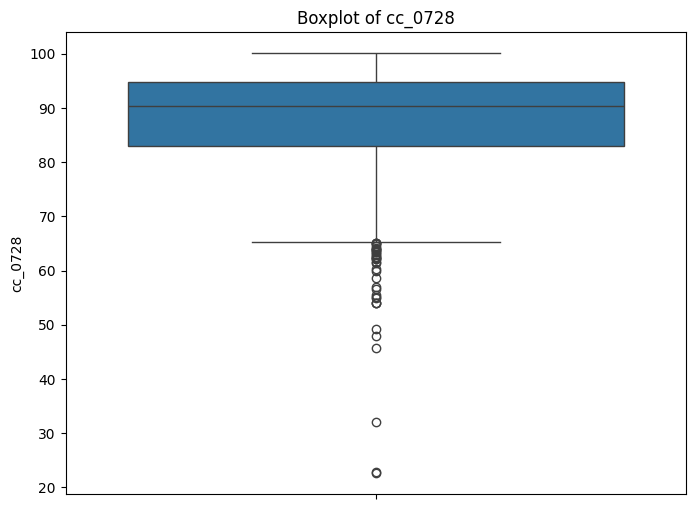

Correlation between cc_0728 and Weight per row (lbs): 0.3315


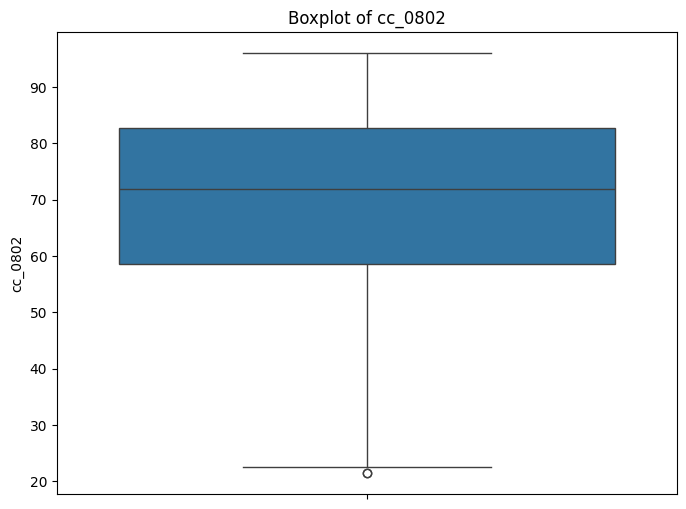

Correlation between cc_0802 and Weight per row (lbs): 0.2753


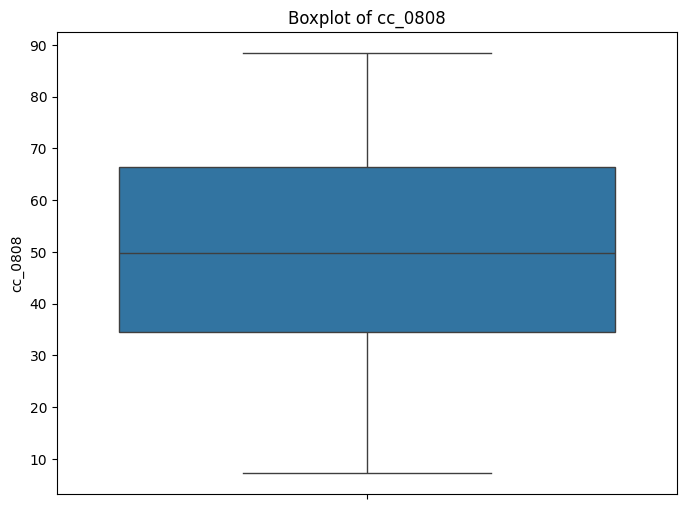

Correlation between cc_0808 and Weight per row (lbs): 0.2497


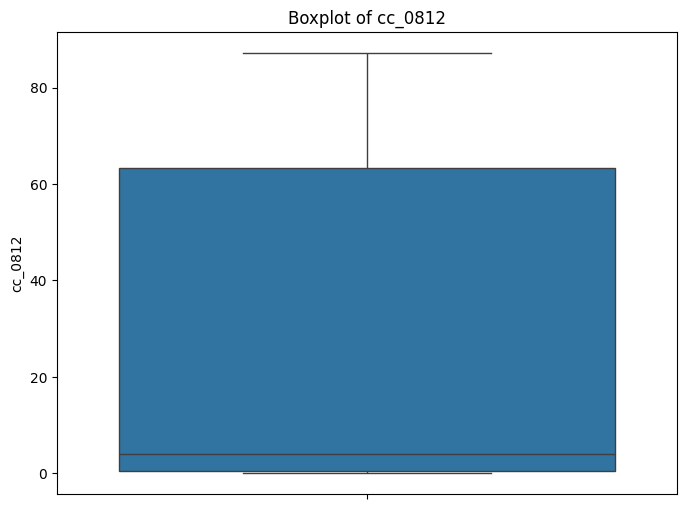

Correlation between cc_0812 and Weight per row (lbs): 0.4235


In [11]:
# Create boxplots for all features and the yield
for col in df.columns:
    # Exclude non-numeric columns and 'irrigation' from this loop
    if df[col].dtype in ['float64', 'int64'] and col != 'irrigation':
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()

        # Report the correlation between each feature and yield
        if col != 'Weight per row (lbs)':
            correlation = df[col].corr(df['Weight per row (lbs)'])
            print(f'Correlation between {col} and Weight per row (lbs): {correlation:.4f}')
        else:
            print(f'Correlation between {col} and Weight per row (lbs): 1.0000')

In [ ]:
# Based on the boxplots, suggest reasonable values to replace the missing data


# Modeling

1. Split the Data into three subsets (training, validation, and test)
- all sets should keep track of parameter settings and their impact on validation performance

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# Training Set (70-80%): Used to train the model


In [ ]:
# Validation Set: Part of the training set to evaluate the model during training and guide tuning decisions

In [ ]:
# Test Set: Set aside until final evaluation

In [ ]:
# Split data into training set (70-80%) and temporary set
train_df, temp_df = train_test_split(df, test_size=0.25, random_state=42) # Using 75% for training and 25% for temporary